# Zero Degree
## Mobile Net size= 16MB
## Resnet50 size= 98MB
## NasNet Mobile size=23MB
## Xception Net size=88MB

In [7]:
train="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\000\\train"
val="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\000\\val"

In [8]:
import numpy as np
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
from tensorflow.compat.v1 import InteractiveSession
import warnings
import os
import shutil
from PIL import ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
import keras
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
from collections import Counter
import imutils
from imutils import paths
from tensorflow.keras.preprocessing.image import img_to_array

In [10]:
train_datagen = ImageDataGenerator(width_shift_range=0.2)
val_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# Callbacks

In [11]:
#Defining our callbacks
c1=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=6, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)
c2=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
)


# Resnet50

In [13]:
model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 29s 974ms/step - loss: 1.3475 - accuracy: 0.5542 - val_loss: 0.9323 - val_accuracy: 0.8333
Epoch 2/10
30/30 [==============================] - 27s 903ms/step - loss: 0.6860 - accuracy: 0.8708 - val_loss: 0.7036 - val_accuracy: 0.5833
Epoch 3/10
30/30 [==============================] - 27s 900ms/step - loss: 0.4319 - accuracy: 0.9250 - val_loss: 0.5584 - val_accuracy: 0.7500
Epoch 4/10
30/30 [==============================] - 27s 904ms/step - loss: 0.3226 - accuracy: 0.9500 - val_loss: 0.3740 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 27s 909ms/step - loss: 0.2361 - accuracy: 0.9750 - val_loss: 0.3755 - val_accuracy: 0.9167
Epoch 6/10
30/30 [==============================] - 27s 898ms/step - loss: 0.1918 - accuracy: 0.9917 - val_loss: 0.3801 - val_accuracy: 0.8333
Epoch 7/10
30/30 [==============================] - 27s 900ms/step - loss: 0.1400 - accuracy: 1.0000 - val_loss: 0.2980 - val_accuracy: 1.0000

# Plots 

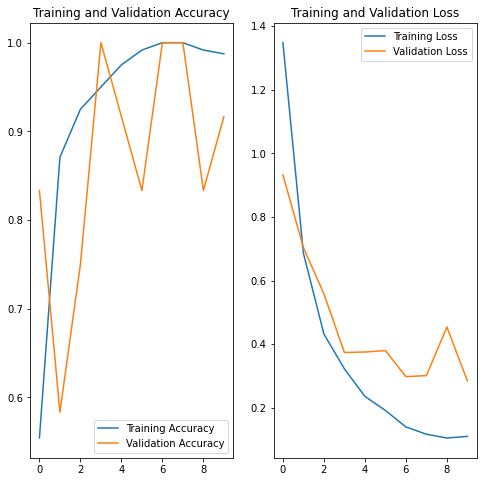

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MobileNet

In [ ]:
model1=tf.keras.applications.MobileNet(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

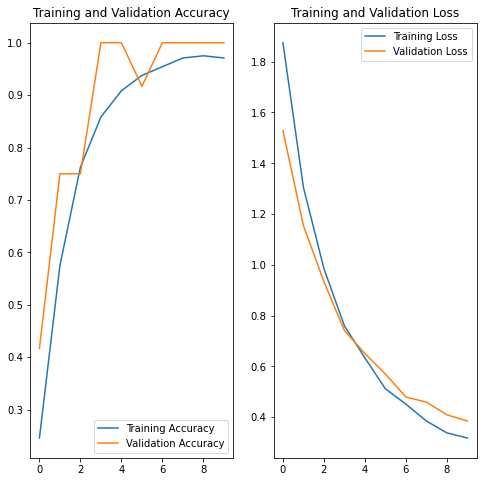

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# NasNetMobile

In [20]:
model1=tf.keras.applications.NASNetMobile(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

19996672/19993432 [==============================] - 2s 0us/step
Epoch 1/10
30/30 [==============================] - 26s 866ms/step - loss: 1.9669 - accuracy: 0.2208 - val_loss: 1.6395 - val_accuracy: 0.2500
Epoch 2/10
30/30 [==============================] - 17s 563ms/step - loss: 1.7617 - accuracy: 0.2583 - val_loss: 1.5692 - val_accuracy: 0.4167
Epoch 3/10
30/30 [==============================] - 17s 556ms/step - loss: 1.6391 - accuracy: 0.3167 - val_loss: 1.4831 - val_accuracy: 0.3333
Epoch 4/10
30/30 [==============================] - 17s 556ms/step - loss: 1.6524 - accuracy: 0.3542 - val_loss: 1.5599 - val_accuracy: 0.3333
Epoch 5/10
30/30 [==============================] - 17s 562ms/step - loss: 1.6375 - accuracy: 0.3000 - val_loss: 1.4731 - val_accuracy: 0.5833
Epoch 6/10
30/30 [==============================] - 17s 552ms/step - loss: 1.6315 - accuracy: 0.3042 - val_loss: 1.4183 - val_accuracy: 0.5000
Epoch 7/10
30/30 [==============================] - 17s 564ms/step - loss: 1.

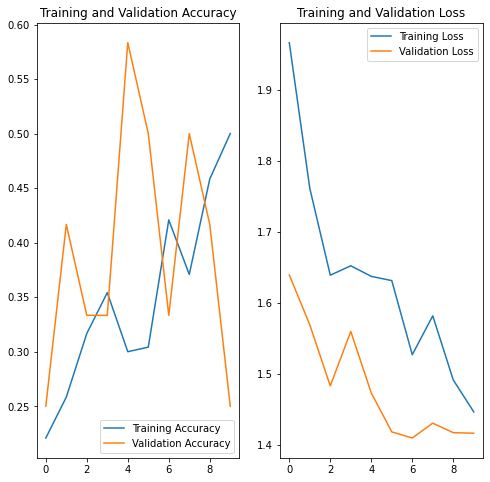

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Xception Net takes default input_shape as 299 X 299

In [23]:
train_datagen = ImageDataGenerator(width_shift_range=0.2)
val_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (299, 299),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (299,299),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [24]:
model1=tf.keras.applications.Xception(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(299,299,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 64s 2s/step - loss: 3.2232 - accuracy: 0.2833 - val_loss: 2.3436 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 62s 2s/step - loss: 1.7405 - accuracy: 0.4167 - val_loss: 2.4678 - val_accuracy: 0.4167
Epoch 3/10
30/30 [==============================] - 62s 2s/step - loss: 1.3645 - accuracy: 0.5167 - val_loss: 2.1805 - val_accuracy: 0.3333
Epoch 4/10
30/30 [==============================] - 62s 2s/step - loss: 0.8984 - accuracy: 0.6458 - val_loss: 1.9890 - val_accuracy: 0.3333
Epoch 5/10
30/30 [==============================] - 62s 2s/step - loss: 0.8646 - accuracy: 0.6958 - val_loss: 1.7766 - val_accuracy: 0.4167
Epoch 6/10
30/30 [==============================] - 62s 2s/step - loss: 0.6752 - accuracy: 0.7542 - val_loss: 1.7071 - val_accuracy: 0.5833
Epoch 7/10
30/30 [==============================] - 62s 2s/step - loss: 0.5725 - accuracy: 0.7958 - val_loss: 1.5332 - val_accuracy: 0.4167
Epoch 8/10
30/30 [==

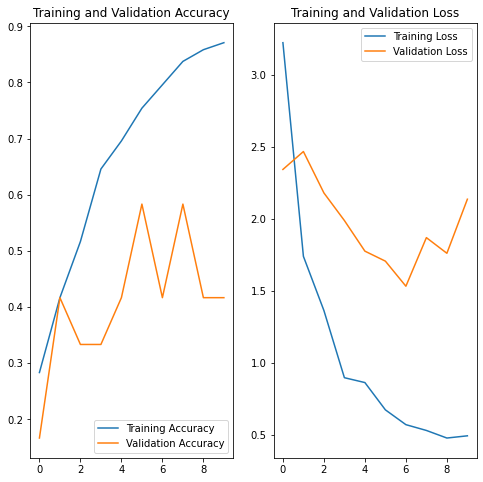

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Reshaping data for better convergence

In [33]:
train_datagen = ImageDataGenerator(width_shift_range=0.2,rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# Resnet50

In [27]:
model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 29s 977ms/step - loss: 1.8585 - accuracy: 0.1542 - val_loss: 1.8001 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 26s 879ms/step - loss: 1.8266 - accuracy: 0.1542 - val_loss: 1.8044 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 27s 884ms/step - loss: 1.7999 - accuracy: 0.1708 - val_loss: 1.7601 - val_accuracy: 0.3333
Epoch 4/10
30/30 [==============================] - 27s 890ms/step - loss: 1.8070 - accuracy: 0.2000 - val_loss: 1.7508 - val_accuracy: 0.4167
Epoch 5/10
30/30 [==============================] - 27s 885ms/step - loss: 1.7794 - accuracy: 0.2333 - val_loss: 1.7656 - val_accuracy: 0.2500
Epoch 6/10
30/30 [==============================] - 26s 874ms/step - loss: 1.8076 - accuracy: 0.2458 - val_loss: 1.7222 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 27s 916ms/step - loss: 1.7582 - accuracy: 0.2458 - val_loss: 1.7017 - val_accuracy: 0.4167

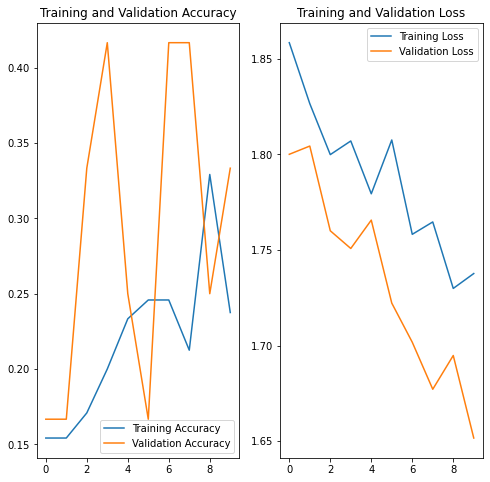

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MobileNet

In [29]:
model1=tf.keras.applications.MobileNet(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 12s 399ms/step - loss: 1.7329 - accuracy: 0.3583 - val_loss: 1.5258 - val_accuracy: 0.5000
Epoch 2/10
30/30 [==============================] - 11s 366ms/step - loss: 1.0568 - accuracy: 0.7625 - val_loss: 0.9187 - val_accuracy: 0.8333
Epoch 3/10
30/30 [==============================] - 11s 370ms/step - loss: 0.7037 - accuracy: 0.8792 - val_loss: 0.7099 - val_accuracy: 0.8333
Epoch 4/10
30/30 [==============================] - 11s 371ms/step - loss: 0.5424 - accuracy: 0.9208 - val_loss: 0.5123 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 12s 388ms/step - loss: 0.4131 - accuracy: 0.9417 - val_loss: 0.4782 - val_accuracy: 0.9167
Epoch 6/10
30/30 [==============================] - 12s 390ms/step - loss: 0.3205 - accuracy: 0.9792 - val_loss: 0.4163 - val_accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 12s 392ms/step - loss: 0.2517 - accuracy: 0.9875 - val_loss: 0.3668 - val_accuracy: 1.0000

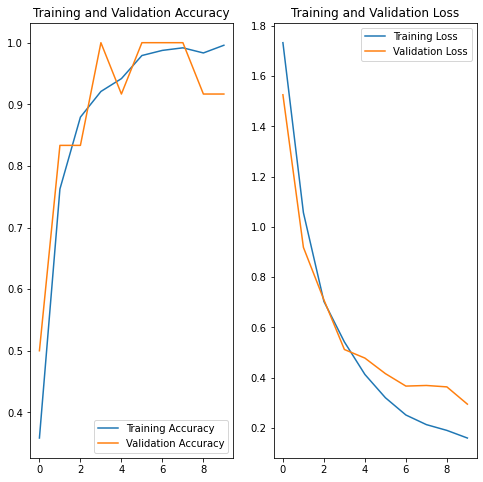

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#  NASNet Mobile

In [34]:
model1=tf.keras.applications.NASNetMobile(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 29s 961ms/step - loss: 1.5986 - accuracy: 0.4042 - val_loss: 1.4023 - val_accuracy: 0.4167
Epoch 2/10
30/30 [==============================] - 16s 541ms/step - loss: 1.0926 - accuracy: 0.7750 - val_loss: 1.1611 - val_accuracy: 0.7500
Epoch 3/10
30/30 [==============================] - 16s 539ms/step - loss: 0.8479 - accuracy: 0.8417 - val_loss: 1.0140 - val_accuracy: 0.6667
Epoch 4/10
30/30 [==============================] - 16s 537ms/step - loss: 0.7439 - accuracy: 0.7917 - val_loss: 1.0058 - val_accuracy: 0.8333
Epoch 5/10
30/30 [==============================] - 16s 547ms/step - loss: 0.6034 - accuracy: 0.8542 - val_loss: 0.9551 - val_accuracy: 0.7500
Epoch 6/10
30/30 [==============================] - 16s 538ms/step - loss: 0.5434 - accuracy: 0.8708 - val_loss: 0.9422 - val_accuracy: 0.5833
Epoch 7/10
30/30 [==============================] - 16s 549ms/step - loss: 0.4646 - accuracy: 0.8833 - val_loss: 0.8918 - val_accuracy: 0.6667

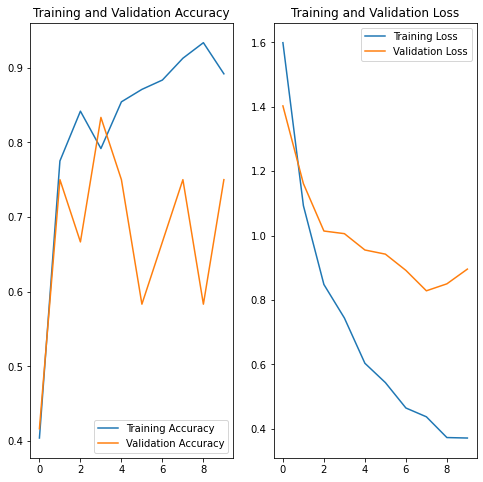

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Xception Net yields poor results upon reshaping.
### Not included 

# 18 Degree

In [39]:
train="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\018\\train"
val="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\018\\val"

In [40]:
train_datagen = ImageDataGenerator(width_shift_range=0.2)
val_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# Resnet50

In [41]:
model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 33s 1s/step - loss: 1.7188 - accuracy: 0.3250 - val_loss: 1.3097 - val_accuracy: 0.4167
Epoch 2/10
30/30 [==============================] - 31s 1s/step - loss: 1.0271 - accuracy: 0.7458 - val_loss: 0.9007 - val_accuracy: 0.7500
Epoch 3/10
30/30 [==============================] - 30s 999ms/step - loss: 0.7269 - accuracy: 0.8958 - val_loss: 0.7328 - val_accuracy: 0.6667
Epoch 4/10
30/30 [==============================] - 29s 975ms/step - loss: 0.5396 - accuracy: 0.9500 - val_loss: 0.7823 - val_accuracy: 0.6667
Epoch 5/10
30/30 [==============================] - 29s 982ms/step - loss: 0.4435 - accuracy: 0.9292 - val_loss: 0.6297 - val_accuracy: 0.7500
Epoch 6/10
30/30 [==============================] - 29s 979ms/step - loss: 0.3496 - accuracy: 0.9667 - val_loss: 0.5289 - val_accuracy: 0.8333
Epoch 7/10
30/30 [==============================] - 30s 991ms/step - loss: 0.2903 - accuracy: 0.9708 - val_loss: 0.5437 - val_accuracy: 0.8333
Epoch

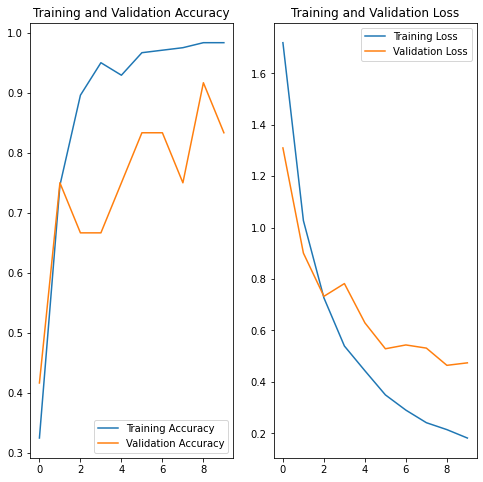

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#  MobileNet

In [43]:
model1=tf.keras.applications.MobileNet(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 12s 413ms/step - loss: 1.7846 - accuracy: 0.2667 - val_loss: 1.7823 - val_accuracy: 0.3333
Epoch 2/10
30/30 [==============================] - 11s 373ms/step - loss: 1.3394 - accuracy: 0.5833 - val_loss: 1.6171 - val_accuracy: 0.3333
Epoch 3/10
30/30 [==============================] - 11s 375ms/step - loss: 1.0962 - accuracy: 0.6792 - val_loss: 1.4173 - val_accuracy: 0.5000
Epoch 4/10
30/30 [==============================] - 11s 377ms/step - loss: 0.9093 - accuracy: 0.7875 - val_loss: 1.3071 - val_accuracy: 0.5000
Epoch 5/10
30/30 [==============================] - 12s 394ms/step - loss: 0.7594 - accuracy: 0.8375 - val_loss: 1.2600 - val_accuracy: 0.5833
Epoch 6/10
30/30 [==============================] - 12s 388ms/step - loss: 0.6338 - accuracy: 0.9125 - val_loss: 1.2669 - val_accuracy: 0.5000
Epoch 7/10
30/30 [==============================] - 12s 393ms/step - loss: 0.5361 - accuracy: 0.9417 - val_loss: 1.2784 - val_accuracy: 0.4167

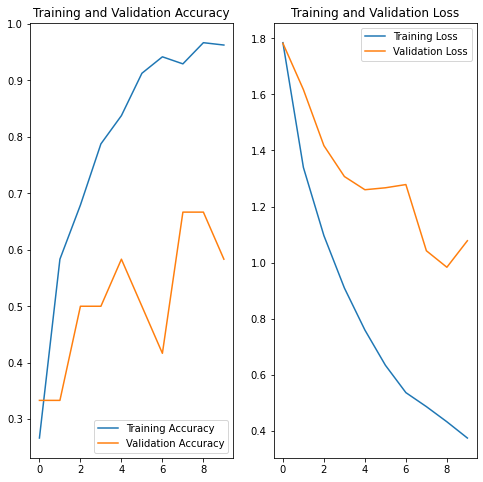

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# NASNet Mobile

In [45]:
model1=tf.keras.applications.NASNetMobile(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 29s 968ms/step - loss: 2.0545 - accuracy: 0.1667 - val_loss: 1.8420 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 17s 578ms/step - loss: 1.8207 - accuracy: 0.2000 - val_loss: 1.7153 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 17s 559ms/step - loss: 1.7085 - accuracy: 0.2833 - val_loss: 1.5790 - val_accuracy: 0.5000
Epoch 4/10
30/30 [==============================] - 17s 571ms/step - loss: 1.6719 - accuracy: 0.3042 - val_loss: 1.5214 - val_accuracy: 0.5000
Epoch 5/10
30/30 [==============================] - 17s 559ms/step - loss: 1.6596 - accuracy: 0.3042 - val_loss: 1.4256 - val_accuracy: 0.6667
Epoch 6/10
30/30 [==============================] - 17s 565ms/step - loss: 1.5999 - accuracy: 0.3542 - val_loss: 1.3673 - val_accuracy: 0.5000
Epoch 7/10
30/30 [==============================] - 17s 583ms/step - loss: 1.4873 - accuracy: 0.4667 - val_loss: 1.2740 - val_accuracy: 0.6667

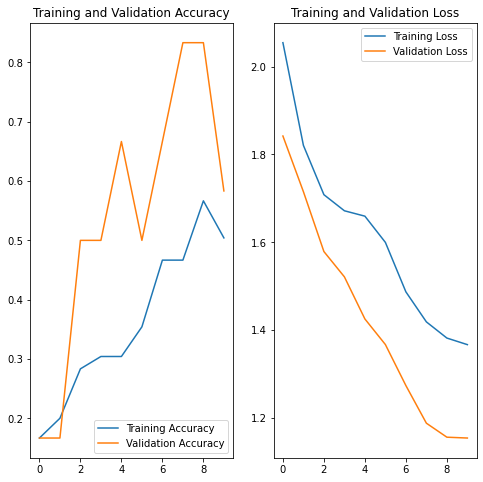

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Reshaping for Xception Net

In [47]:
train_datagen = ImageDataGenerator(width_shift_range=0.2)
val_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (299, 299),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (299,299),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# Xception Net

In [48]:
model1=tf.keras.applications.Xception(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(299,299,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 68s 2s/step - loss: 5.2034 - accuracy: 0.2667 - val_loss: 4.2115 - val_accuracy: 0.3333
Epoch 2/10
30/30 [==============================] - 62s 2s/step - loss: 1.5715 - accuracy: 0.4917 - val_loss: 2.5174 - val_accuracy: 0.5000
Epoch 3/10
30/30 [==============================] - 64s 2s/step - loss: 1.0017 - accuracy: 0.6417 - val_loss: 2.4150 - val_accuracy: 0.4167
Epoch 4/10
30/30 [==============================] - 55s 2s/step - loss: 0.8045 - accuracy: 0.7250 - val_loss: 1.8339 - val_accuracy: 0.4167
Epoch 5/10
30/30 [==============================] - 47s 2s/step - loss: 0.7781 - accuracy: 0.7083 - val_loss: 1.4187 - val_accuracy: 0.4167
Epoch 6/10
30/30 [==============================] - 48s 2s/step - loss: 0.6975 - accuracy: 0.7417 - val_loss: 1.2782 - val_accuracy: 0.5000
Epoch 7/10
30/30 [==============================] - 48s 2s/step - loss: 0.5526 - accuracy: 0.8250 - val_loss: 1.4943 - val_accuracy: 0.4167
Epoch 8/10
30/30 [==

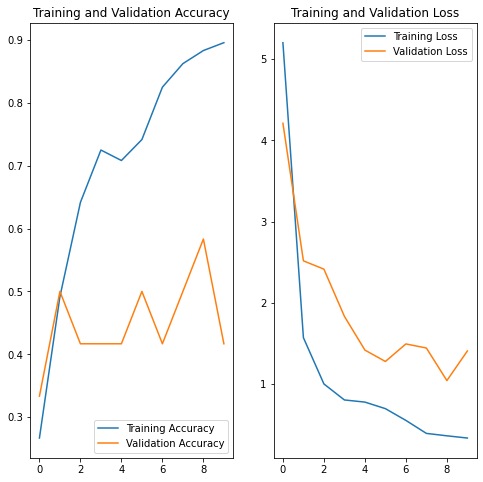

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Reshaping

In [52]:
train_datagen = ImageDataGenerator(width_shift_range=0.2,rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# Resnet50

In [53]:
model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 20s 671ms/step - loss: 1.9443 - accuracy: 0.1542 - val_loss: 1.8125 - val_accuracy: 0.3333
Epoch 2/10
30/30 [==============================] - 22s 739ms/step - loss: 1.8187 - accuracy: 0.1750 - val_loss: 1.7825 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 23s 762ms/step - loss: 1.8014 - accuracy: 0.1833 - val_loss: 1.8161 - val_accuracy: 0.1667
Epoch 4/10
30/30 [==============================] - 23s 752ms/step - loss: 1.8123 - accuracy: 0.1750 - val_loss: 1.8129 - val_accuracy: 0.2500
Epoch 5/10
30/30 [==============================] - 22s 730ms/step - loss: 1.7795 - accuracy: 0.2042 - val_loss: 1.7691 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 22s 736ms/step - loss: 1.7692 - accuracy: 0.2167 - val_loss: 1.7767 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 23s 756ms/step - loss: 1.7617 - accuracy: 0.2125 - val_loss: 1.7464 - val_accuracy: 0.2500

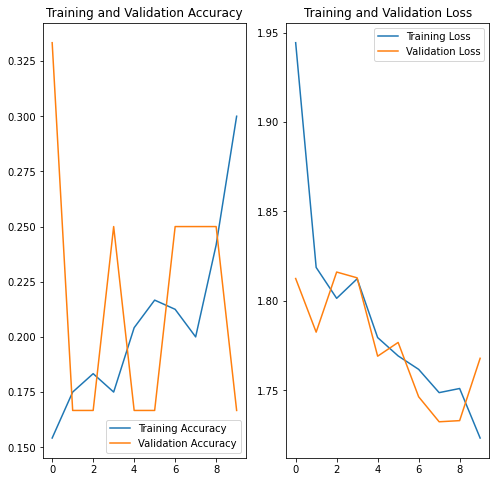

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MobileNet

In [55]:
model1=tf.keras.applications.MobileNet(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 7s 238ms/step - loss: 1.7687 - accuracy: 0.2958 - val_loss: 1.4360 - val_accuracy: 0.5000
Epoch 2/10
30/30 [==============================] - 7s 232ms/step - loss: 1.1856 - accuracy: 0.6917 - val_loss: 1.0777 - val_accuracy: 0.7500
Epoch 3/10
30/30 [==============================] - 7s 231ms/step - loss: 0.8406 - accuracy: 0.8583 - val_loss: 0.9697 - val_accuracy: 0.5833
Epoch 4/10
30/30 [==============================] - 9s 285ms/step - loss: 0.6421 - accuracy: 0.9000 - val_loss: 0.7935 - val_accuracy: 0.7500
Epoch 5/10
30/30 [==============================] - 7s 246ms/step - loss: 0.4894 - accuracy: 0.9667 - val_loss: 0.6877 - val_accuracy: 0.8333
Epoch 6/10
30/30 [==============================] - 7s 233ms/step - loss: 0.3841 - accuracy: 0.9875 - val_loss: 0.6567 - val_accuracy: 0.7500
Epoch 7/10
30/30 [==============================] - 7s 224ms/step - loss: 0.3224 - accuracy: 0.9750 - val_loss: 0.6043 - val_accuracy: 0.7500
Epoch 

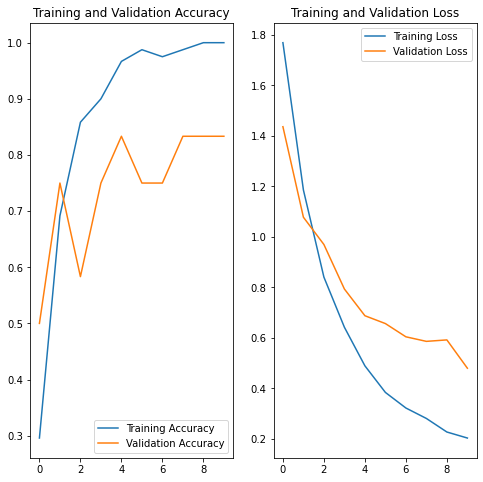

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Nasnet and xception yield unsatisfactory results.
## Not Included

# 36 Degree

In [57]:
train="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\036\\train"
val="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\036\\val"

In [58]:
train_datagen = ImageDataGenerator(width_shift_range=0.2)
val_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [59]:
model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 26s 877ms/step - loss: 1.3994 - accuracy: 0.5000 - val_loss: 1.1948 - val_accuracy: 0.5000
Epoch 2/10
30/30 [==============================] - 31s 1s/step - loss: 0.6213 - accuracy: 0.9083 - val_loss: 1.1498 - val_accuracy: 0.5833
Epoch 3/10
30/30 [==============================] - 30s 997ms/step - loss: 0.3541 - accuracy: 0.9667 - val_loss: 1.1937 - val_accuracy: 0.5000
Epoch 4/10
30/30 [==============================] - 31s 1s/step - loss: 0.2541 - accuracy: 0.9833 - val_loss: 1.1911 - val_accuracy: 0.5000
Epoch 5/10
30/30 [==============================] - 30s 995ms/step - loss: 0.1790 - accuracy: 0.9958 - val_loss: 1.2719 - val_accuracy: 0.5833
Epoch 6/10
30/30 [==============================] - 30s 1s/step - loss: 0.1548 - accuracy: 1.0000 - val_loss: 1.2251 - val_accuracy: 0.5000
Epoch 7/10
30/30 [==============================] - 33s 1s/step - loss: 0.1357 - accuracy: 1.0000 - val_loss: 1.2140 - val_accuracy: 0.5000
Epoch 8/10


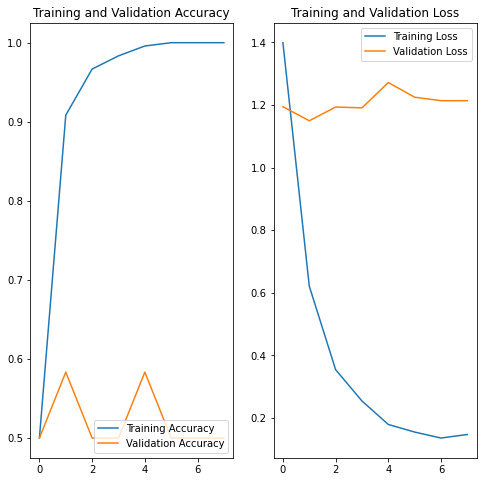

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(8)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MobileNet

In [64]:
model1=tf.keras.applications.MobileNet(
    include_top=False, weights='imagenet',input_shape=(224,224,3) ,
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 6s 217ms/step - loss: 2.0999 - accuracy: 0.2458 - val_loss: 1.6061 - val_accuracy: 0.3333
Epoch 2/10
30/30 [==============================] - 6s 201ms/step - loss: 1.3727 - accuracy: 0.5375 - val_loss: 1.3800 - val_accuracy: 0.5833
Epoch 3/10
30/30 [==============================] - 6s 199ms/step - loss: 1.0217 - accuracy: 0.7167 - val_loss: 1.2618 - val_accuracy: 0.5833
Epoch 4/10
30/30 [==============================] - 6s 214ms/step - loss: 0.7487 - accuracy: 0.8542 - val_loss: 1.2328 - val_accuracy: 0.4167
Epoch 5/10
30/30 [==============================] - 7s 229ms/step - loss: 0.5525 - accuracy: 0.9542 - val_loss: 1.2102 - val_accuracy: 0.4167
Epoch 6/10
30/30 [==============================] - 7s 228ms/step - loss: 0.4793 - accuracy: 0.9542 - val_loss: 1.2445 - val_accuracy: 0.5000
Epoch 7/10
30/30 [==============================] - 7s 226ms/step - loss: 0.4050 - accuracy: 0.9583 - val_loss: 1.1350 - val_accuracy: 0.5000
Epoch 

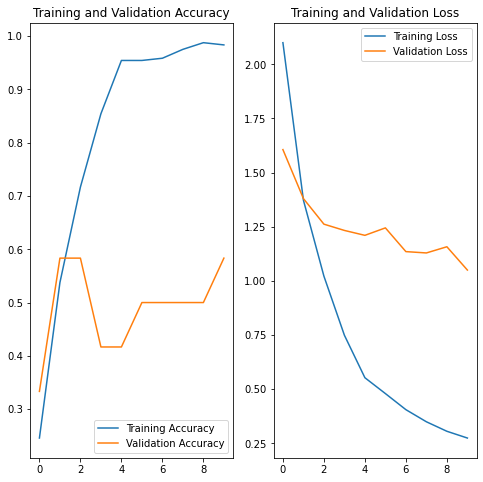

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Nasnet Mobile

In [66]:
model1=tf.keras.applications.NASNetMobile(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(224,224,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 15s 499ms/step - loss: 1.8453 - accuracy: 0.2000 - val_loss: 1.6074 - val_accuracy: 0.3333
Epoch 2/10
30/30 [==============================] - 14s 461ms/step - loss: 1.6646 - accuracy: 0.2583 - val_loss: 1.6478 - val_accuracy: 0.2500
Epoch 3/10
30/30 [==============================] - 14s 463ms/step - loss: 1.6030 - accuracy: 0.3542 - val_loss: 1.5082 - val_accuracy: 0.4167
Epoch 4/10
30/30 [==============================] - 13s 446ms/step - loss: 1.5489 - accuracy: 0.3792 - val_loss: 1.4296 - val_accuracy: 0.4167
Epoch 5/10
30/30 [==============================] - 13s 441ms/step - loss: 1.4823 - accuracy: 0.4167 - val_loss: 1.3804 - val_accuracy: 0.3333
Epoch 6/10
30/30 [==============================] - 13s 435ms/step - loss: 1.3730 - accuracy: 0.4958 - val_loss: 1.3159 - val_accuracy: 0.4167
Epoch 7/10
30/30 [==============================] - 13s 439ms/step - loss: 1.3747 - accuracy: 0.5083 - val_loss: 1.3733 - val_accuracy: 0.5000

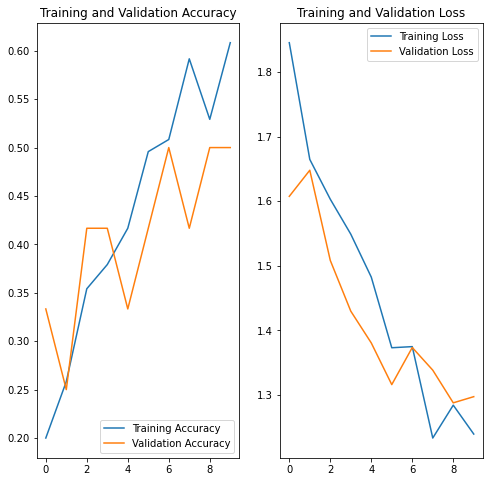

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [68]:
train_datagen = ImageDataGenerator(width_shift_range=0.2)
val_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (299, 299),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (299,299),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# Xception net

In [69]:
model1=tf.keras.applications.Xception(
    include_top=False, weights='imagenet', 
     pooling='avg',input_shape=(299,299,3))
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 50s 2s/step - loss: 2.6186 - accuracy: 0.4042 - val_loss: 2.2634 - val_accuracy: 0.3333
Epoch 2/10
30/30 [==============================] - 48s 2s/step - loss: 0.9447 - accuracy: 0.6667 - val_loss: 2.1321 - val_accuracy: 0.2500
Epoch 3/10
30/30 [==============================] - 49s 2s/step - loss: 0.5819 - accuracy: 0.8000 - val_loss: 2.3210 - val_accuracy: 0.2500
Epoch 4/10
30/30 [==============================] - 48s 2s/step - loss: 0.5214 - accuracy: 0.8125 - val_loss: 2.4634 - val_accuracy: 0.2500
Epoch 5/10
30/30 [==============================] - 50s 2s/step - loss: 0.4139 - accuracy: 0.8458 - val_loss: 2.5223 - val_accuracy: 0.2500
Epoch 6/10
30/30 [==============================] - 52s 2s/step - loss: 0.2804 - accuracy: 0.9000 - val_loss: 2.2055 - val_accuracy: 0.2500
Epoch 7/10
30/30 [==============================] - 51s 2s/step - loss: 0.2116 - accuracy: 0.9542 - val_loss: 2.0910 - val_accuracy: 0.2500
Epoch 8/10
30/30 [==

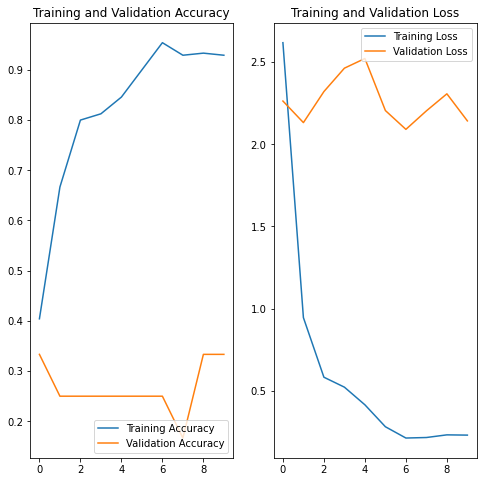

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 54 degrees

In [72]:
train="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\054\\train"
val="C:\\Users\\Aayush Kandpal\\Downloads\\Gait Dataset-20210119T045001Z-001\\Gait Dataset\\054\\val"

In [73]:
train_datagen = ImageDataGenerator(width_shift_range=0.2)
val_datagen = ImageDataGenerator()


train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

val_gen = val_datagen.flow_from_directory(val,
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# Resnet50

In [74]:
model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 30s 1s/step - loss: 1.5149 - accuracy: 0.4458 - val_loss: 1.5203 - val_accuracy: 0.5000
Epoch 2/10
30/30 [==============================] - 32s 1s/step - loss: 0.8277 - accuracy: 0.9000 - val_loss: 1.4428 - val_accuracy: 0.3333
Epoch 3/10
30/30 [==============================] - 30s 999ms/step - loss: 0.5492 - accuracy: 0.9375 - val_loss: 1.5026 - val_accuracy: 0.3333
Epoch 4/10
30/30 [==============================] - 30s 1s/step - loss: 0.3945 - accuracy: 0.9708 - val_loss: 1.8385 - val_accuracy: 0.3333
Epoch 5/10
30/30 [==============================] - 30s 994ms/step - loss: 0.2702 - accuracy: 0.9958 - val_loss: 1.5498 - val_accuracy: 0.4167
Epoch 6/10
30/30 [==============================] - 31s 1s/step - loss: 0.2229 - accuracy: 1.0000 - val_loss: 1.6185 - val_accuracy: 0.3333
Epoch 7/10
30/30 [==============================] - 30s 1s/step - loss: 0.2298 - accuracy: 0.9958 - val_loss: 1.6385 - val_accuracy: 0.3333
Epoch 8/10
30/

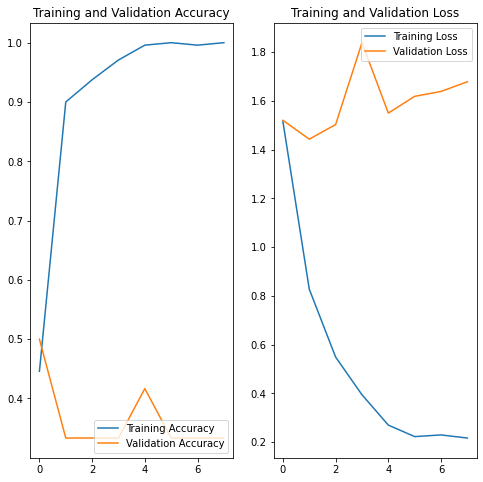

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(8)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Mobile net

In [77]:
model1=tf.keras.applications.MobileNet(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 6s 211ms/step - loss: 1.7713 - accuracy: 0.2708 - val_loss: 1.4433 - val_accuracy: 0.3333
Epoch 2/10
30/30 [==============================] - 6s 196ms/step - loss: 1.2052 - accuracy: 0.5750 - val_loss: 1.2099 - val_accuracy: 0.5000
Epoch 3/10
30/30 [==============================] - 6s 203ms/step - loss: 1.0366 - accuracy: 0.7250 - val_loss: 1.0077 - val_accuracy: 0.6667
Epoch 4/10
30/30 [==============================] - 7s 226ms/step - loss: 0.8027 - accuracy: 0.8333 - val_loss: 0.8788 - val_accuracy: 0.7500
Epoch 5/10
30/30 [==============================] - 7s 226ms/step - loss: 0.6496 - accuracy: 0.8750 - val_loss: 0.8845 - val_accuracy: 0.7500
Epoch 6/10
30/30 [==============================] - 7s 227ms/step - loss: 0.5311 - accuracy: 0.9083 - val_loss: 0.8158 - val_accuracy: 0.6667
Epoch 7/10
30/30 [==============================] - 7s 248ms/step - loss: 0.5100 - accuracy: 0.9250 - val_loss: 0.8300 - val_accuracy: 0.6667
Epoch 

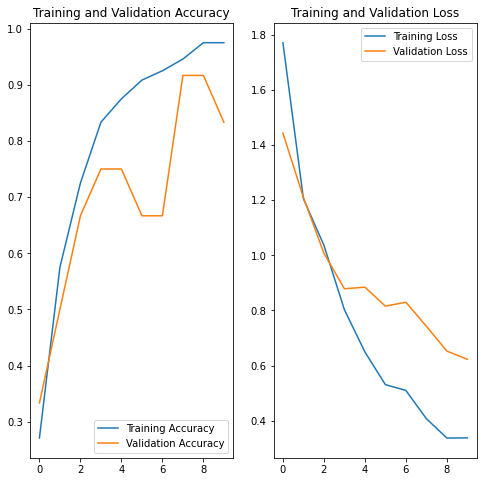

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# NASNetMobile


In [79]:
model1=tf.keras.applications.NASNetMobile(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_gen,validation_data=val_gen,epochs=10,callbacks=[c1,c2])

Epoch 1/10
30/30 [==============================] - 16s 536ms/step - loss: 1.7571 - accuracy: 0.2417 - val_loss: 1.5705 - val_accuracy: 0.2500
Epoch 2/10
30/30 [==============================] - 13s 441ms/step - loss: 1.5939 - accuracy: 0.2833 - val_loss: 1.4349 - val_accuracy: 0.3333
Epoch 3/10
30/30 [==============================] - 13s 436ms/step - loss: 1.5030 - accuracy: 0.3833 - val_loss: 1.3792 - val_accuracy: 0.4167
Epoch 4/10
30/30 [==============================] - 13s 435ms/step - loss: 1.4626 - accuracy: 0.3917 - val_loss: 1.3677 - val_accuracy: 0.5000
Epoch 5/10
30/30 [==============================] - 13s 435ms/step - loss: 1.4145 - accuracy: 0.4167 - val_loss: 1.4073 - val_accuracy: 0.4167
Epoch 6/10
30/30 [==============================] - 13s 435ms/step - loss: 1.3167 - accuracy: 0.5000 - val_loss: 1.4627 - val_accuracy: 0.3333
Epoch 7/10
30/30 [==============================] - 13s 442ms/step - loss: 1.2946 - accuracy: 0.5500 - val_loss: 1.3631 - val_accuracy: 0.4167

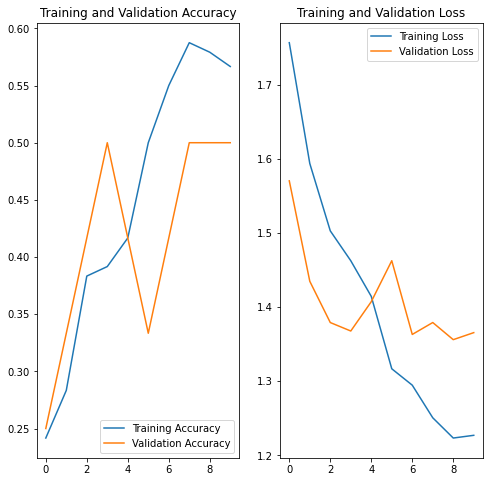

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()